<a href="https://colab.research.google.com/github/Venkatesh-Swarna/usa-energy-forecasting/blob/main/USA_Energy_Supply%2C_Demand_%26_Forecasting_Analytics_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Ingestion & Profiling (Python)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "/content/drive/MyDrive/USA Energy Audit/Primary_Energy_Overview.xlsx"

df_raw = pd.read_excel(
    file_path,
    skiprows=10,
    header=0
)

df_raw.head(5)

,Month,Total Fossil Fuels Production,Nuclear Electric Power Production,Total Renewable Energy Production,Total Primary Energy Production,Primary Energy Imports,Primary Energy Exports,Primary Energy Net Imports,Primary Energy Stock Change and Other,Total Fossil Fuels Consumption,Nuclear Electric Power Consumption,Total Renewable Energy Consumption,Total Primary Energy Consumption
0,NaT,(Quadrillion Btu),(Quadrillion Btu),(Quadrillion Btu),(Quadrillion Btu),(Quadrillion Btu),(Quadrillion Btu),(Quadrillion Btu),(Quadrillion Btu),(Quadrillion Btu),(Quadrillion Btu),(Quadrillion Btu),(Quadrillion Btu)
1,1973-01-01,4.932632,0.068103,0.219839,5.220574,1.17308,0.125781,1.047299,0.771858,6.747651,0.068103,0.219839,7.039731
2,1973-02-01,4.729582,0.064634,0.19733,4.991545,1.168005,0.120883,1.047122,0.390129,6.163095,0.064634,0.19733,6.428796
3,1973-03-01,4.946902,0.072494,0.218686,5.238082,1.309473,0.13995,1.169523,-0.06764,6.044647,0.072494,0.218686,6.339964
4,1973-04-01,4.716271,0.06407,0.20933,4.989672,1.085169,0.194185,0.890984,-0.110067,5.493184,0.06407,0.20933,5.770589


**Drop the units row**

In [2]:
df = df_raw[1:]
df.head(5)

,Month,Total Fossil Fuels Production,Nuclear Electric Power Production,Total Renewable Energy Production,Total Primary Energy Production,Primary Energy Imports,Primary Energy Exports,Primary Energy Net Imports,Primary Energy Stock Change and Other,Total Fossil Fuels Consumption,Nuclear Electric Power Consumption,Total Renewable Energy Consumption,Total Primary Energy Consumption
1,1973-01-01,4.932632,0.068103,0.219839,5.220574,1.17308,0.125781,1.047299,0.771858,6.747651,0.068103,0.219839,7.039731
2,1973-02-01,4.729582,0.064634,0.19733,4.991545,1.168005,0.120883,1.047122,0.390129,6.163095,0.064634,0.19733,6.428796
3,1973-03-01,4.946902,0.072494,0.218686,5.238082,1.309473,0.13995,1.169523,-0.06764,6.044647,0.072494,0.218686,6.339964
4,1973-04-01,4.716271,0.06407,0.20933,4.989672,1.085169,0.194185,0.890984,-0.110067,5.493184,0.06407,0.20933,5.770589
5,1973-05-01,4.956995,0.062111,0.215982,5.235087,1.162804,0.196775,0.966029,-0.305335,5.613551,0.062111,0.215982,5.895781


In [3]:
df.shape

(633, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 1 to 633
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Month                                  633 non-null    datetime64[ns]
 1   Total Fossil Fuels Production          633 non-null    object        
 2   Nuclear Electric Power Production      633 non-null    object        
 3   Total Renewable Energy Production      633 non-null    object        
 4   Total Primary Energy Production        633 non-null    object        
 5   Primary Energy Imports                 633 non-null    object        
 6   Primary Energy Exports                 633 non-null    object        
 7   Primary Energy Net Imports             633 non-null    object        
 8   Primary Energy Stock Change and Other  633 non-null    object        
 9   Total Fossil Fuels Consumption         633 non-null    object    

In [5]:
df.describe()

,Month
count,633
mean,1999-05-02 04:17:03.696682496
min,1973-01-01 00:00:00
25%,1986-03-01 00:00:00
50%,1999-05-01 00:00:00
75%,2012-07-01 00:00:00
max,2025-09-01 00:00:00


**Checking for Null values**



In [6]:
df.isna().sum()


,0
Month,0
Total Fossil Fuels Production,0
Nuclear Electric Power Production,0
Total Renewable Energy Production,0
Total Primary Energy Production,0
Primary Energy Imports,0
Primary Energy Exports,0
Primary Energy Net Imports,0
Primary Energy Stock Change and Other,0
Total Fossil Fuels Consumption,0


**Convert all numeric columns**

In [7]:
numeric_cols = df.columns.drop("Month")

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

/tmp/ipython-input-3213457998.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")


# Data Analysis and Feature engineering
**Energy Mix Contribution (%)**

In [8]:
df["Fossil_Production_Share_%"] = (
    df["Total Fossil Fuels Production"] /
    df["Total Primary Energy Production"] * 100
)

df["Renewable_Production_Share_%"] = (
    df["Total Renewable Energy Production"] /
    df["Total Primary Energy Production"] * 100
)

df["Nuclear_Production_Share_%"] = (
    df["Nuclear Electric Power Production"] /
    df["Total Primary Energy Production"] * 100
)


/tmp/ipython-input-2757453267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Fossil_Production_Share_%"] = (
/tmp/ipython-input-2757453267.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Renewable_Production_Share_%"] = (
/tmp/ipython-input-2757453267.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

**Energy Dependency Indicator**

In [9]:
df["Energy_Dependency_%"] = (
    df["Primary Energy Net Imports"] /
    df["Total Primary Energy Consumption"] * 100
)


/tmp/ipython-input-2965826812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Energy_Dependency_%"] = (


**Consumption vs Production Gap (Structural Deficit)**

In [10]:
df["Energy_Gap"] = (
    df["Total Primary Energy Consumption"] -
    df["Total Primary Energy Production"]
)


/tmp/ipython-input-647766529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Energy_Gap"] = (


**Logical Consistency Checks**

In [11]:
df["Energy_Balance_Check"] = (
    df["Total Primary Energy Production"]
    + df["Primary Energy Net Imports"]
    - df["Total Primary Energy Consumption"]
    + df["Primary Energy Stock Change and Other"]
)

/tmp/ipython-input-113238358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Energy_Balance_Check"] = (


In [12]:
df["Energy_Balance_Check"].describe()

,Energy_Balance_Check
count,6.330000e+02
mean,-1.895735e-08
std,5.650312e-07
min,-1.000000e-06
25%,-6.106227e-16
50%,0.000000e+00
75%,6.106227e-16
max,1.000000e-06


I validated the dataset using an energy balance equation to ensure internal consistency.

*The dataset demonstrates near-perfect internal energy balance, with deviations on the order of 10⁻⁶ Quadrillion Btu, indicating extremely high measurement consistency and reliability.*

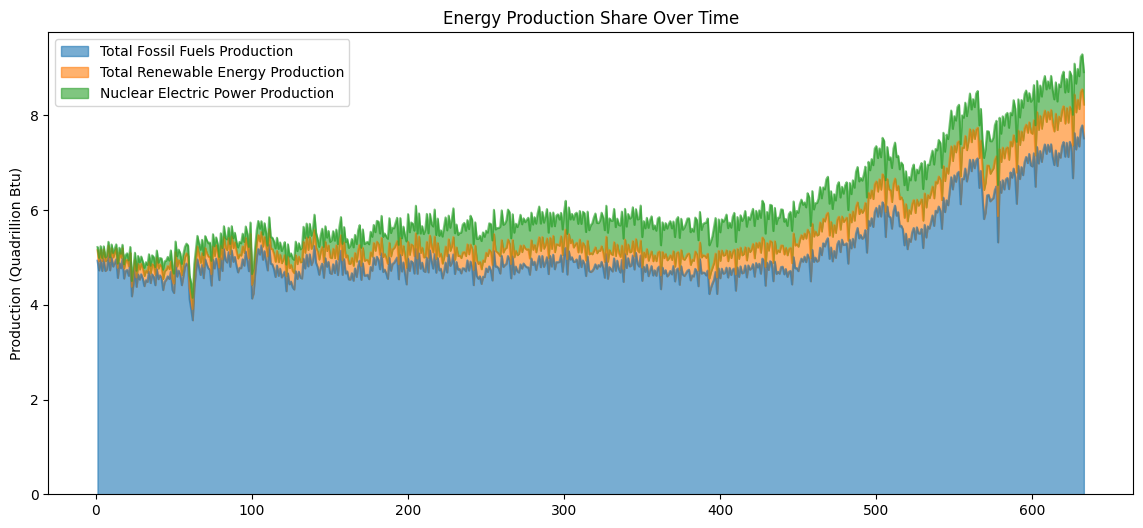

In [13]:
# Stacked area plot
df[['Total Fossil Fuels Production','Total Renewable Energy Production','Nuclear Electric Power Production']].plot(
    kind='area', stacked=True, figsize=(14,6), alpha=0.6)
plt.title('Energy Production Share Over Time')
plt.ylabel('Production (Quadrillion Btu)')
plt.show()


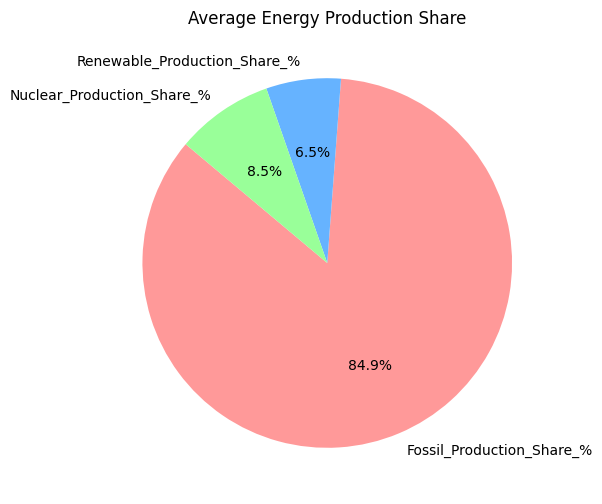

In [14]:
avg_share = df[['Fossil_Production_Share_%','Renewable_Production_Share_%','Nuclear_Production_Share_%']].mean()
plt.figure(figsize=(6,6))
plt.pie(avg_share, labels=avg_share.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Average Energy Production Share')
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 1 to 633
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Month                                  633 non-null    datetime64[ns]
 1   Total Fossil Fuels Production          633 non-null    float64       
 2   Nuclear Electric Power Production      633 non-null    float64       
 3   Total Renewable Energy Production      633 non-null    float64       
 4   Total Primary Energy Production        633 non-null    float64       
 5   Primary Energy Imports                 633 non-null    float64       
 6   Primary Energy Exports                 633 non-null    float64       
 7   Primary Energy Net Imports             633 non-null    float64       
 8   Primary Energy Stock Change and Other  633 non-null    float64       
 9   Total Fossil Fuels Consumption         633 non-null    float64   

In [16]:
df['Month'] = pd.to_datetime(df['Month'])
df = df.sort_values('Month')
df.set_index('Month', inplace=True)

/tmp/ipython-input-116058758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = pd.to_datetime(df['Month'])


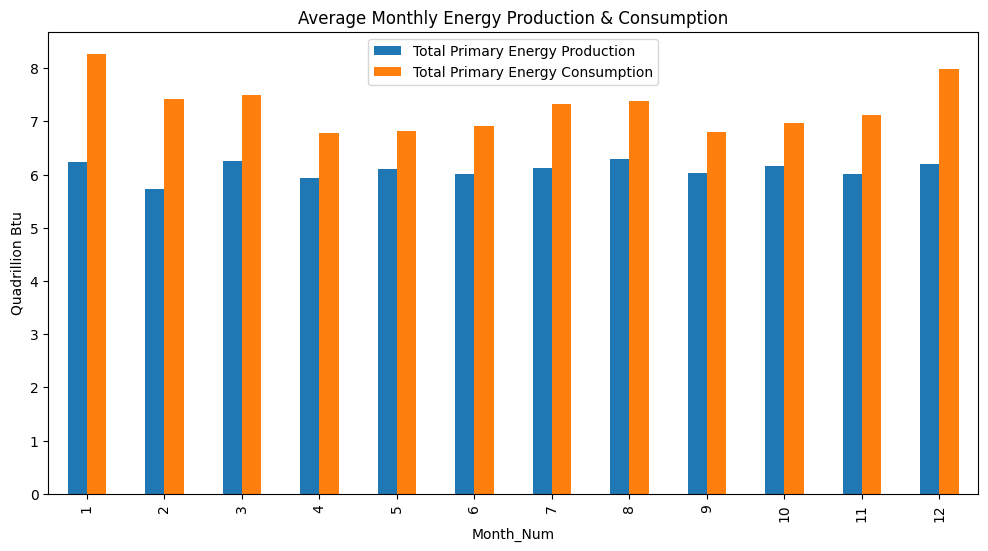

In [17]:
df['Month_Num'] = df.index.month
monthly_avg = df.groupby('Month_Num')[['Total Primary Energy Production','Total Primary Energy Consumption']].mean()
monthly_avg.plot(kind='bar', figsize=(12,6))
plt.title('Average Monthly Energy Production & Consumption')
plt.ylabel('Quadrillion Btu')
plt.show()

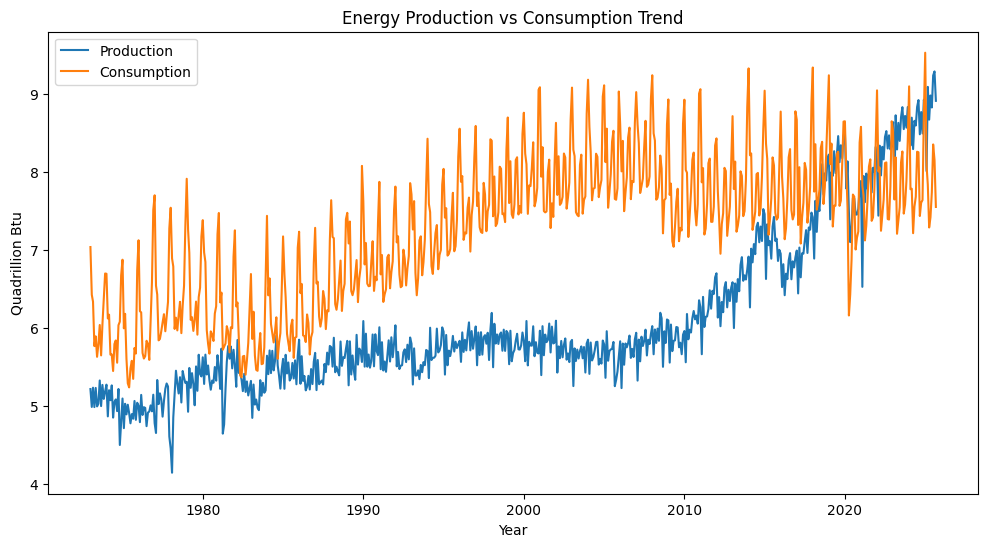

In [18]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df["Total Primary Energy Production"], label="Production")
plt.plot(df.index, df["Total Primary Energy Consumption"], label="Consumption")
plt.legend()
plt.title("Energy Production vs Consumption Trend")
plt.xlabel("Year")
plt.ylabel("Quadrillion Btu")
plt.show()

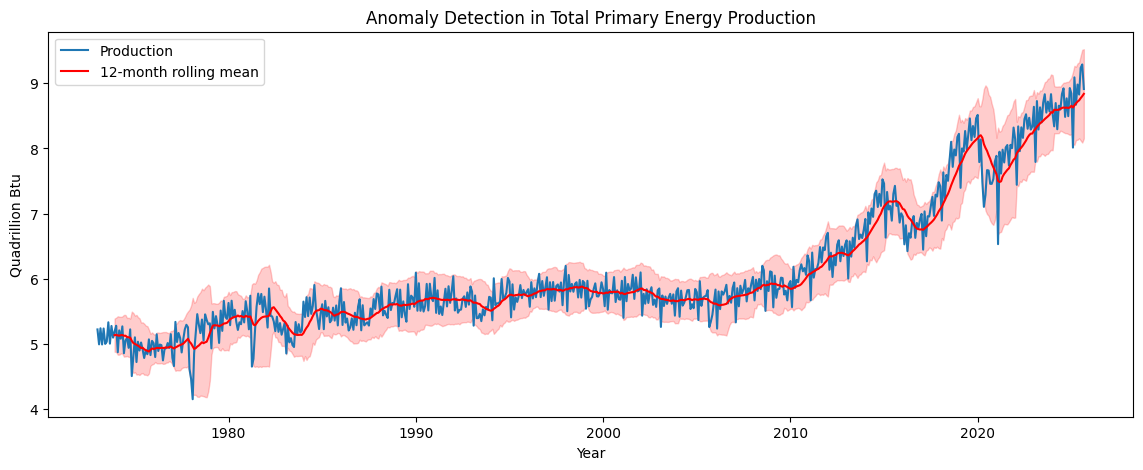

In [19]:
rolling_mean = df['Total Primary Energy Production'].rolling(12).mean()
rolling_std = df['Total Primary Energy Production'].rolling(12).std()
plt.figure(figsize=(14,5))
plt.plot(df.index, df['Total Primary Energy Production'], label='Production')
plt.plot(df.index, rolling_mean, color='red', label='12-month rolling mean')
plt.fill_between(df.index, rolling_mean - 2*rolling_std, rolling_mean + 2*rolling_std, color='red', alpha=0.2)
plt.title('Anomaly Detection in Total Primary Energy Production')
plt.xlabel("Year")
plt.ylabel("Quadrillion Btu")
plt.legend()
plt.show()


In [20]:
yoy_change = df['Total Primary Energy Consumption'].pct_change(12)

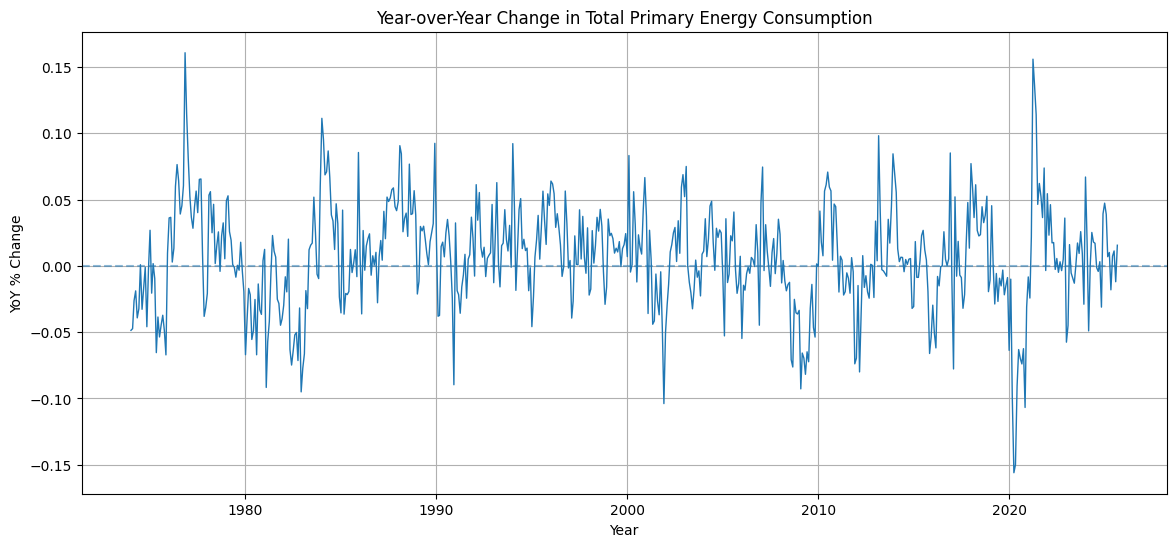

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(yoy_change, linewidth=1)
plt.axhline(0, linestyle='--', alpha=0.5)

plt.title('Year-over-Year Change in Total Primary Energy Consumption')
plt.xlabel('Year')
plt.ylabel('YoY % Change')
plt.grid(True)
plt.show()


**Observations**

*   YoY changes mostly hover between -0.05 and +0.05, which means energy consumption is generally stable with small growth/decline.
*   Extreme dips around 2020 clearly correspond to the COVID-19 shock, and other dips may correspond to economic recessions.
*   Volatility seems cyclical, indicating repeating regime changes rather than random fluctuations.







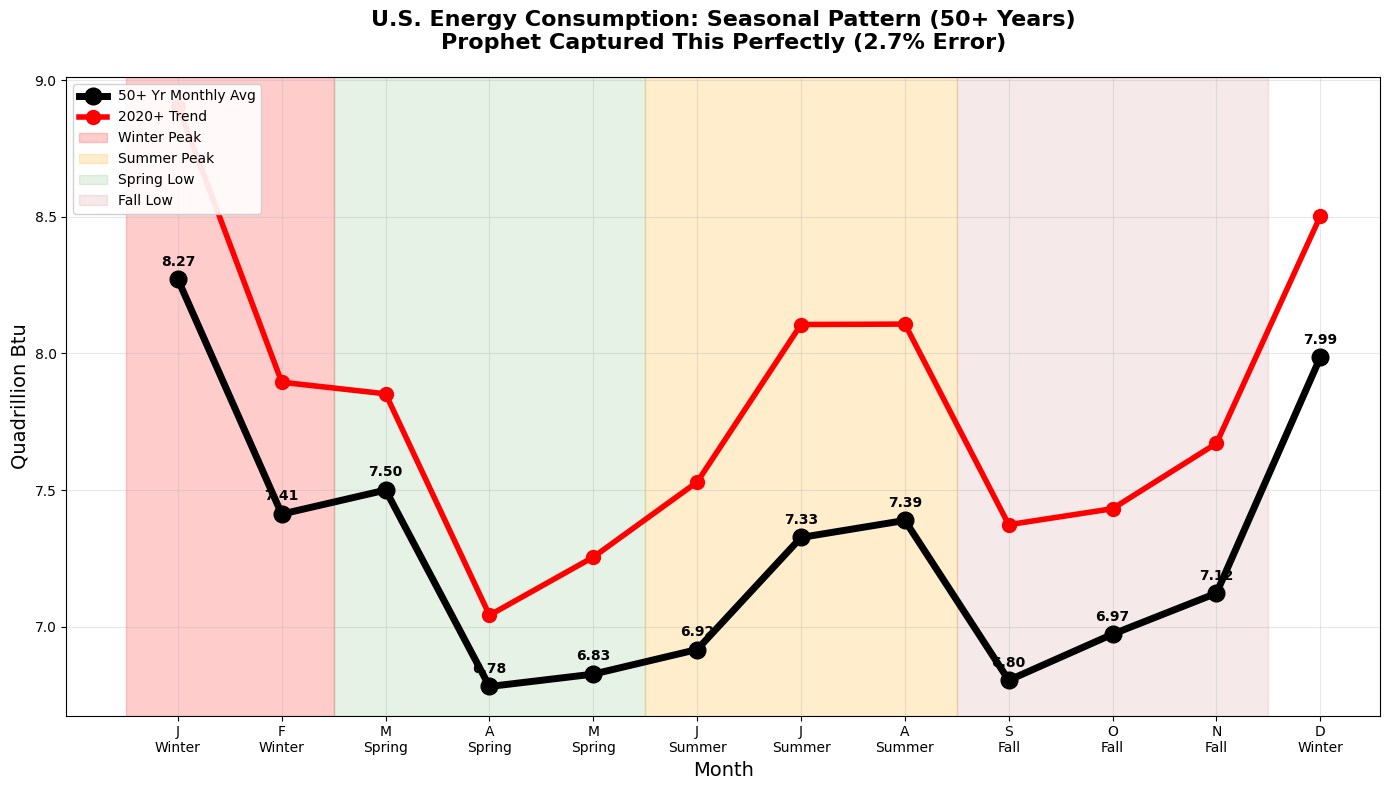

Seasonal Swing: 8.27 (monthly_avg Max) - 6.78 (monthly_avg Min)  = 1.49 QBTU
Peak months: [1, 12, 3]


In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Create from your FULL df (minimal memory)
df_season = df[['Total Primary Energy Consumption']].copy()
df_season['month'] = df_season.index.month
df_season['season'] = df_season['month'].map({
    12:'Winter',1:'Winter',2:'Winter',
    3:'Spring',4:'Spring',5:'Spring',
    6:'Summer',7:'Summer',8:'Summer',
    9:'Fall',10:'Fall',11:'Fall'
})

# SINGLE PERFECT GRAPH
plt.figure(figsize=(14, 8))

# 1. MONTHLY LINE (true pattern)
monthly_avg = df_season.groupby('month')['Total Primary Energy Consumption'].mean()
plt.plot(range(1,13), monthly_avg.values, 'ko-', linewidth=5, markersize=12, label='50+ Yr Monthly Avg')

# 2. RECENT TREND
recent_avg = df_season[df_season.index >= '2020-01-01'].groupby('month')['Total Primary Energy Consumption'].mean()
plt.plot(range(1,13), recent_avg.values, 'ro-', linewidth=4, markersize=10, label='2020+ Trend')

# 3. SEASONAL HIGHLIGHTS (background shading)
plt.axvspan(0.5, 2.5, alpha=0.2, color='red',   label='Winter Peak')
plt.axvspan(5.5, 8.5, alpha=0.2, color='orange', label='Summer Peak')
plt.axvspan(2.5, 5.5, alpha=0.1, color='green',  label='Spring Low')
plt.axvspan(8.5, 11.5,alpha=0.1, color='brown',  label='Fall Low')

# Styling
plt.title('U.S. Energy Consumption: Seasonal Pattern (50+ Years)\nProphet Captured This Perfectly (2.7% Error)',
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Quadrillion Btu', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.xticks(range(1,13), ['J\nWinter','F\nWinter','M\nSpring','A\nSpring','M\nSpring',
                        'J\nSummer','J\nSummer','A\nSummer','S\nFall','O\nFall','N\nFall','D\nWinter'])
plt.legend(loc='upper left', framealpha=0.9)
plt.grid(True, alpha=0.3)

# Value labels
for i, v in enumerate(monthly_avg.values):
    plt.annotate(f'{v:.2f}', (i+1, v+0.05), ha='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

print(f"Seasonal Swing: {monthly_avg.max():.2f} (monthly_avg Max) - {monthly_avg.min():.2f} (monthly_avg Min)  = {monthly_avg.max()-monthly_avg.min():.2f} QBTU")
print("Peak months:", monthly_avg.nlargest(3).index.tolist())


In [23]:
season_avg = df_season.groupby('season')['Total Primary Energy Consumption'].mean().sort_values(ascending=False)

print("\nSeason Ranking (50+ Years):")
overall_avg = df_season['Total Primary Energy Consumption'].mean()
for season, avg in season_avg.items():
    pct = (avg / overall_avg * 100).round(1)
    print(f"{season:<18} {avg:>6.1f} ({pct:>5.1f}%)")


Season Ranking (50+ Years):
Winter                7.9 (108.4%)
Summer                7.2 ( 99.1%)
Spring                7.0 ( 96.7%)
Fall                  7.0 ( 95.7%)


# Outlier detection (visual + Z‑score + IQR).


**Visual outlier checks**

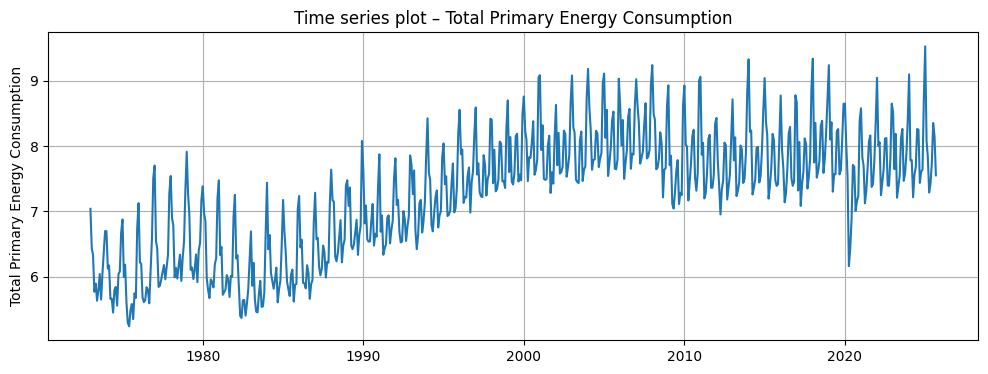

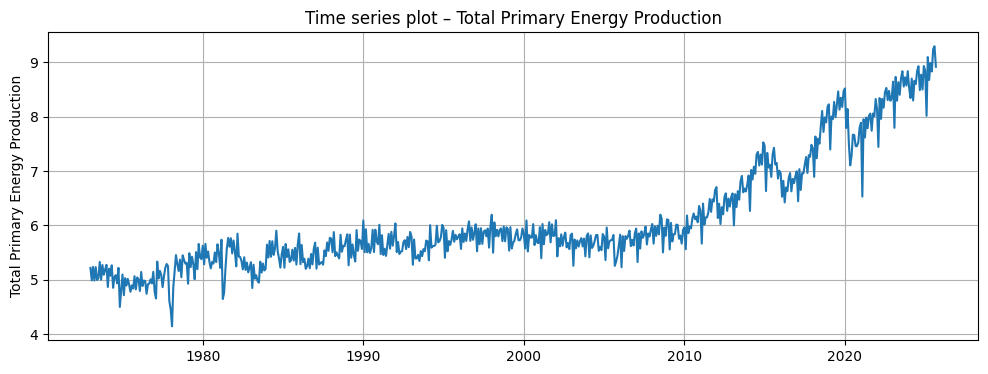

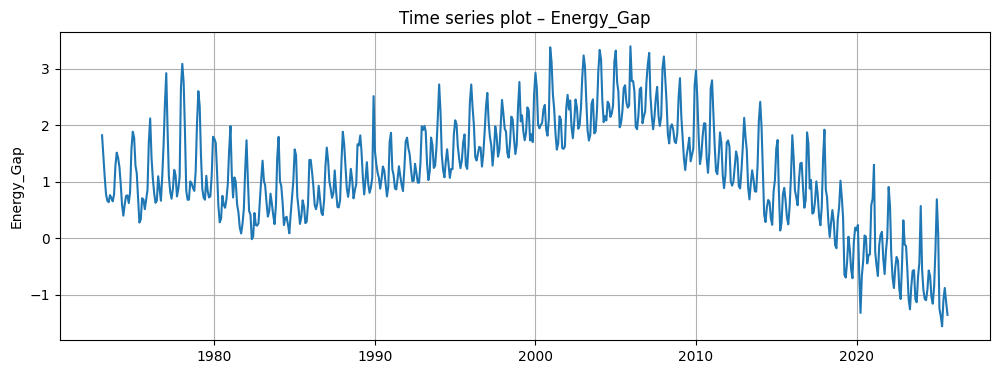

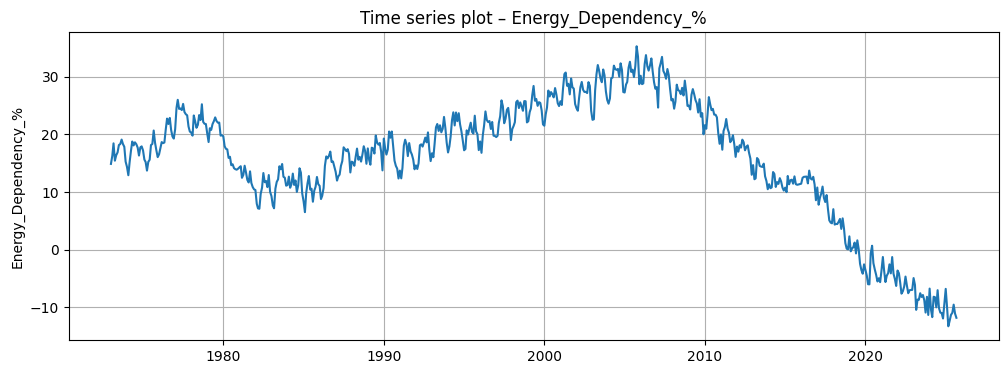

In [24]:
import matplotlib.pyplot as plt

cols_to_check = [
    "Total Primary Energy Consumption",
    "Total Primary Energy Production",
    "Energy_Gap",
    "Energy_Dependency_%"
]

for col in cols_to_check:
    plt.figure(figsize=(12,4))
    plt.plot(df.index, df[col])
    plt.title(f"Time series plot – {col}")
    plt.ylabel(col)
    plt.grid(True)
    plt.show()


**Rolling Z‑score based outliers**

In [25]:
target = "Total Primary Energy Consumption"

window = 12  # 1 year of monthly data
roll_mean = df[target].rolling(window=window, center=False).mean()
roll_std  = df[target].rolling(window=window, center=False).std()

z_scores = (df[target] - roll_mean) / roll_std

threshold = 3  # |z| > 3 as outlier
outlier_mask = z_scores.abs() > threshold
outliers = df.loc[outlier_mask, [target]]

print("Number of outliers detected:", outlier_mask.sum())
outliers.head()


Number of outliers detected: 0


,Total Primary Energy Consumption
Month,


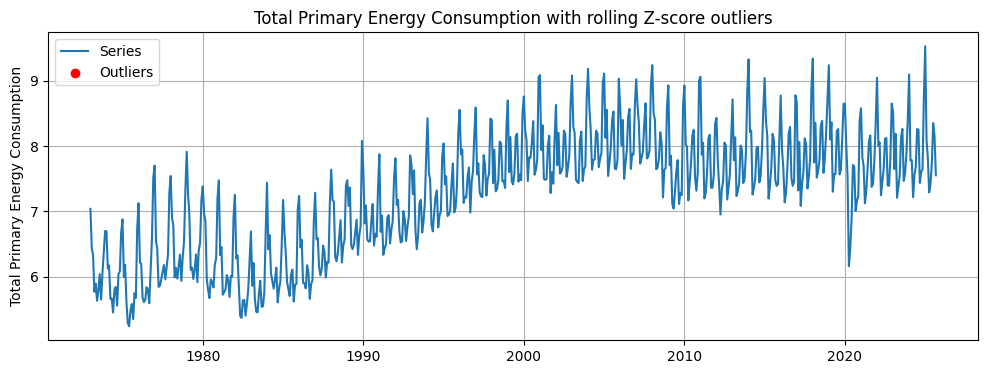

In [26]:
plt.figure(figsize=(12,4))
plt.plot(df.index, df[target], label="Series")
plt.scatter(outliers.index, outliers[target], color="red", label="Outliers", zorder=3)
plt.title(f"{target} with rolling Z-score outliers")
plt.ylabel(target)
plt.legend()
plt.grid(True)
plt.show()


**IQR‑based outliers (distribution view)**

In [27]:
Q1 = df[target].quantile(0.25)
Q3 = df[target].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

iqr_mask = (df[target] < lower_bound) | (df[target] > upper_bound)
iqr_outliers = df.loc[iqr_mask, [target]]

print("IQR outliers:", iqr_mask.sum())
iqr_outliers.head()


IQR outliers: 0


,Total Primary Energy Consumption
Month,


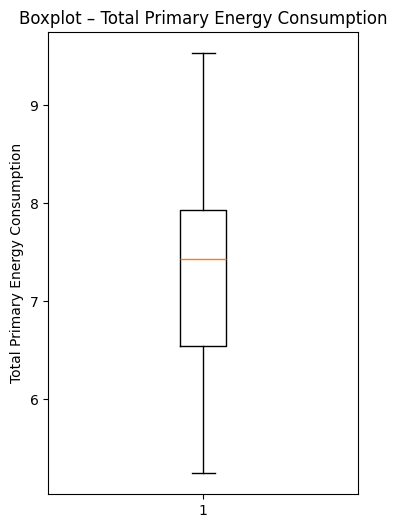

In [28]:
plt.figure(figsize=(4,6))
plt.boxplot(df[target].dropna(), vert=True)
plt.title(f"Boxplot – {target}")
plt.ylabel(target)
plt.show()


# Train/validation/test split


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [30]:
# Make sure df is sorted and indexed by Month
df = df.sort_index()

target_col = "Total Primary Energy Consumption"
y = df[target_col]


In [31]:
# Adjust years if you prefer different cut points
train_end = "2017-12-01"
val_end   = "2021-12-01"

y_train = y.loc[:train_end]
y_val   = y.loc[train_end:]   # temp, will split again
y_val   = y_val.loc[:val_end]
y_test  = y.loc[val_end:]


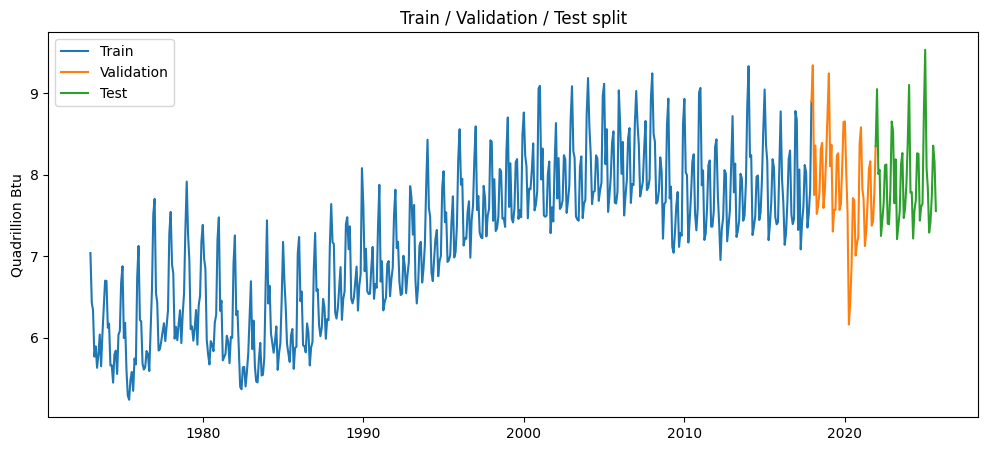

In [32]:
plt.figure(figsize=(12,5))
plt.plot(y_train, label="Train")
plt.plot(y_val, label="Validation")
plt.plot(y_test, label="Test")
plt.legend()
plt.title("Train / Validation / Test split")
plt.ylabel("Quadrillion Btu")
plt.show()


In [33]:
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100


In [34]:
results = []

def eval_model(name, y_true_val, y_pred_val, y_true_test=None, y_pred_test=None):
    metrics = {
        "model": name,
        "val_MAE":  mean_absolute_error(y_true_val, y_pred_val),
        "val_RMSE": sqrt(mean_squared_error(y_true_val, y_pred_val)),
        "val_MAPE": mape(y_true_val, y_pred_val),
    }
    if (y_true_test is not None) and (y_pred_test is not None):
        metrics.update({
            "test_MAE":  mean_absolute_error(y_true_test, y_pred_test),
            "test_RMSE": sqrt(mean_squared_error(y_true_test, y_pred_test)),
            "test_MAPE": mape(y_true_test, y_pred_test),
        })
    return metrics

**Baseline models (naive & seasonal naive)**

**Naive**

*Validation*

In [35]:
# history = train + val for shifting
y_hist_for_val = pd.concat([y_train, y_val])

naive_val_pred = y_hist_for_val.shift(1).loc[y_val.index]
naive_val_pred = naive_val_pred.dropna()

y_val_naive = y_val.loc[naive_val_pred.index]

print("Naive VAL MAE:",  mean_absolute_error(y_val_naive, naive_val_pred))
print("Naive VAL RMSE:", sqrt(mean_squared_error(y_val_naive, naive_val_pred)))
print("Naive VAL MAPE:", mape(y_val_naive, naive_val_pred))


Naive VAL MAE: 0.47282060000000004
Naive VAL RMSE: 0.6050231274719009
Naive VAL MAPE: 6.092071103840838


*Test*

In [36]:
# history = train + val + test for test predictions
y_hist_for_test = pd.concat([y_train, y_val, y_test])

naive_test_pred = y_hist_for_test.shift(1).loc[y_test.index]
naive_test_pred = naive_test_pred.dropna()

y_test_naive = y_test.loc[naive_test_pred.index]

print("Naive TEST MAE:",  mean_absolute_error(y_test_naive, naive_test_pred))
print("Naive TEST RMSE:", sqrt(mean_squared_error(y_test_naive, naive_test_pred)))
print("Naive TEST MAPE:", mape(y_test_naive, naive_test_pred))


Naive TEST MAE: 0.4679071276595744
Naive TEST RMSE: 0.5939257777785819
Naive TEST MAPE: 5.88280518757187


In [37]:
results.append(
    eval_model(
        "Naive",
        y_true_val=y_val_naive,
        y_pred_val=naive_val_pred,
        y_true_test=y_test_naive,
        y_pred_test=naive_test_pred,
    )
)

**Seasonal naive (12‑month)**

In [38]:
seasonal_lag = 12

y_hist_for_val = pd.concat([y_train, y_val])

snaive_val_pred = y_hist_for_val.shift(seasonal_lag).loc[y_val.index]
snaive_val_pred = snaive_val_pred.dropna()

y_val_snaive = y_val.loc[snaive_val_pred.index]

print("SNaive VAL MAE:",  mean_absolute_error(y_val_snaive, snaive_val_pred))
print("SNaive VAL RMSE:", sqrt(mean_squared_error(y_val_snaive, snaive_val_pred)))
print("SNaive VAL MAPE:", mape(y_val_snaive, snaive_val_pred))


SNaive VAL MAE: 0.41939909999999997
SNaive VAL RMSE: 0.5865172837677164
SNaive VAL MAPE: 5.457263409892992


*Test*

In [39]:
y_hist_for_test = pd.concat([y_train, y_val, y_test])

snaive_test_pred = y_hist_for_test.shift(seasonal_lag).loc[y_test.index]
snaive_test_pred = snaive_test_pred.dropna()

y_test_snaive = y_test.loc[snaive_test_pred.index]

print("SNaive TEST MAE:",  mean_absolute_error(y_test_snaive, snaive_test_pred))
print("SNaive TEST RMSE:", sqrt(mean_squared_error(y_test_snaive, snaive_test_pred)))
print("SNaive TEST MAPE:", mape(y_test_snaive, snaive_test_pred))


SNaive TEST MAE: 0.23384980851063822
SNaive TEST RMSE: 0.34142890609485255
SNaive TEST MAPE: 2.8666492064325553


In [40]:
results.append(
    eval_model(
        "Seasonal-Naive(12)",
        y_true_val=y_val_snaive,
        y_pred_val=snaive_val_pred,
        y_true_test=y_test_snaive,
        y_pred_test=snaive_test_pred,
    )
)


**ARIMA**

In [41]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

*Fit on TRAIN*

In [42]:
arima_order = (2, 1, 2)

# Fit on TRAIN
arima_model = ARIMA(y_train, order=arima_order)
arima_res   = arima_model.fit()
print(arima_res.summary())


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:     Total Primary Energy Consumption   No. Observations:                  540
Model:                               ARIMA(2, 1, 2)   Log Likelihood                -322.976
Date:                              Thu, 08 Jan 2026   AIC                            655.951
Time:                                      05:55:50   BIC                            677.400
Sample:                                  01-01-1973   HQIC                           664.340
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2052      0.087     -2.349      0.019      -0.377      -0.034
ar.L2          0.30

*Validation forecast*

In [43]:
steps_val = len(y_val)
arima_val_pred = arima_res.forecast(steps=steps_val)
arima_val_pred.index = y_val.index  # align to y_val

print("ARIMA VAL MAE:",  mean_absolute_error(y_val, arima_val_pred))
print("ARIMA VAL RMSE:", sqrt(mean_squared_error(y_val, arima_val_pred)))
print("ARIMA VAL MAPE:", mape(y_val, arima_val_pred))

ARIMA VAL MAE: 0.4972440582428483
ARIMA VAL RMSE: 0.6153882262984295
ARIMA VAL MAPE: 6.477009767668886


*Refit on TRAIN+VAL*

In [44]:
y_trainval = pd.concat([y_train, y_val])

arima_tv_model = ARIMA(y_trainval, order=arima_order)
arima_tv_res   = arima_tv_model.fit()

steps_test = len(y_test)
arima_test_pred = arima_tv_res.forecast(steps=steps_test)
arima_test_pred.index = y_test.index  # align to y_test

print("ARIMA TEST MAE:",  mean_absolute_error(y_test, arima_test_pred))
print("ARIMA TEST RMSE:", sqrt(mean_squared_error(y_test, arima_test_pred)))
print("ARIMA TEST MAPE:", mape(y_test, arima_test_pred))


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA TEST MAE: 0.4055785969494206
ARIMA TEST RMSE: 0.5300494346421327
ARIMA TEST MAPE: 4.970226409553314


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [45]:
results.append(
    eval_model(
        f"ARIMA{arima_order}",
        y_true_val=y_val,
        y_pred_val=arima_val_pred,
        y_true_test=y_test,
        y_pred_test=arima_test_pred,
    )
)


**SARIMA**

In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMA parameters
sarima_order         = (1, 1, 1)      # non-seasonal (p,d,q)
sarima_seasonal_order = (1, 1, 1, 12)  # seasonal (P,D,Q,s=12 months)

# ---- FIT ON TRAIN ----
sarima_model = SARIMAX(
    y_train,
    order=sarima_order,
    seasonal_order=sarima_seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False,
)

sarima_res = sarima_model.fit(disp=False)
print(sarima_res.summary())


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:     Total Primary Energy Consumption   No. Observations:                  540
Model:               SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 161.069
Date:                              Thu, 08 Jan 2026   AIC                           -312.139
Time:                                      05:55:53   BIC                           -290.937
Sample:                                  01-01-1973   HQIC                          -303.828
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4052      0.063      6.469      0.000       0.282       0.528
ma.L1         -0.82

*Validation forecast*

In [47]:
# Forecast len(y_val) steps ahead from end of train
steps_val = len(y_val)
sarima_val_pred = sarima_res.forecast(steps=steps_val)
sarima_val_pred.index = y_val.index  # align indices

print("SARIMA VAL MAE:",  mean_absolute_error(y_val, sarima_val_pred))
print("SARIMA VAL RMSE:", sqrt(mean_squared_error(y_val, sarima_val_pred)))
print("SARIMA VAL MAPE:", mape(y_val, sarima_val_pred))


SARIMA VAL MAE: 0.5134847530457078
SARIMA VAL RMSE: 0.6573732549959188
SARIMA VAL MAPE: 6.641962118734213


*TRAIN+VAL Forecast*

In [48]:
# Refit on TRAIN+VAL
y_trainval = pd.concat([y_train, y_val])

sarima_tv_model = SARIMAX(
    y_trainval,
    order=sarima_order,
    seasonal_order=sarima_seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False,
)

sarima_tv_res = sarima_tv_model.fit(disp=False)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [49]:
# Forecast len(y_test) steps ahead from end of train+val
steps_test = len(y_test)
sarima_test_pred = sarima_tv_res.forecast(steps=steps_test)
sarima_test_pred.index = y_test.index  # align indices

print("SARIMA TEST MAE:",  mean_absolute_error(y_test, sarima_test_pred))
print("SARIMA TEST RMSE:", sqrt(mean_squared_error(y_test, sarima_test_pred)))
print("SARIMA TEST MAPE:", mape(y_test, sarima_test_pred))


SARIMA TEST MAE: 0.4712295569778221
SARIMA TEST RMSE: 0.6303434760423317
SARIMA TEST MAPE: 5.7448055318956515


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [50]:
results.append(
    eval_model(
        f"SARIMA{sarima_order}x{sarima_seasonal_order}",
        y_true_val=y_val,
        y_pred_val=sarima_val_pred,
        y_true_test=y_test,
        y_pred_test=sarima_test_pred,
    )
)


**Prophet (using steps approach)**

In [51]:
!pip install prophet

In [52]:
from prophet import Prophet

series = y.reset_index()
series.columns = ["ds", "y"]

train_end_ts = pd.to_datetime(train_end)
val_end_ts   = pd.to_datetime(val_end)



*Fit to Train*

In [53]:
m = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
m.fit(series[series["ds"] <= train_end_ts])

*Validation Forecast*

In [54]:
future_val = m.make_future_dataframe(periods=len(y_val), freq="MS")
forecast_val = m.predict(future_val)

val_predictions = forecast_val[forecast_val["ds"].isin(series[(series["ds"] > train_end_ts) & (series["ds"] <= val_end_ts)]["ds"])]
prophet_val_pred_series = val_predictions.set_index("ds")["yhat"].reindex(y_val.index)
prophet_val_pred = prophet_val_pred_series.dropna()
y_val_prophet = y_val.loc[prophet_val_pred.index]

print(f"Prophet VAL: {len(y_val_prophet)} points")
print("Prophet VAL MAE:", mean_absolute_error(y_val_prophet, prophet_val_pred))
print("Prophet VAL RMSE:", sqrt(mean_squared_error(y_val_prophet, prophet_val_pred)))
print("Prophet VAL MAPE:", mape(y_val_prophet, prophet_val_pred))

Prophet VAL: 48 points
Prophet VAL MAE: 0.3123030125873903
Prophet VAL RMSE: 0.3852106671728646
Prophet VAL MAPE: 4.053942150511379


*Test forecast*

In [55]:
m_tv = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
m_tv.fit(series[series["ds"] <= val_end_ts])


In [56]:
future_test = m_tv.make_future_dataframe(periods=len(y_test), freq="MS")
forecast_test = m_tv.predict(future_test)

test_predictions = forecast_test[forecast_test["ds"].isin(series[series["ds"] > val_end_ts]["ds"])]
prophet_test_pred_series = test_predictions.set_index("ds")["yhat"].reindex(y_test.index)
prophet_test_pred = prophet_test_pred_series.dropna()
y_test_prophet = y_test.loc[prophet_test_pred.index]

print(f"Prophet TEST: {len(y_test_prophet)} points")
print("Prophet TEST MAE:", mean_absolute_error(y_test_prophet, prophet_test_pred))
print("Prophet TEST RMSE:", sqrt(mean_squared_error(y_test_prophet, prophet_test_pred)))
print("Prophet TEST MAPE:", mape(y_test_prophet, prophet_test_pred))


Prophet TEST: 45 points
Prophet TEST MAE: 0.21702057721580512
Prophet TEST RMSE: 0.26321278751483823
Prophet TEST MAPE: 2.680844564474279


In [57]:
results.append(
    eval_model("Prophet", y_val_prophet, prophet_val_pred, y_test_prophet, prophet_test_pred)
)


**Holt-Winters**

In [58]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import gc  # for memory cleanup

# 6.1 Fit on TRAIN only (direct indexing, no df_train)
hw_model = ExponentialSmoothing(
    y_train,  # already defined from your splits
    trend="add",
    seasonal="add",
    seasonal_periods=12
).fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


*Validation Forecast*

In [59]:
steps_val = len(y_val)
hw_val_pred = hw_model.forecast(steps=steps_val)
hw_val_pred.index = y_val.index

print("Holt-Winters VAL MAE:",  mean_absolute_error(y_val, hw_val_pred))
print("Holt-Winters VAL RMSE:", sqrt(mean_squared_error(y_val, hw_val_pred)))
print("Holt-Winters VAL MAPE:", mape(y_val, hw_val_pred))

Holt-Winters VAL MAE: 0.577256693250882
Holt-Winters VAL RMSE: 0.714318770847477
Holt-Winters VAL MAPE: 7.523421585268741


*Refit on TRAIN+VAL*

In [60]:
y_trainval = pd.concat([y_train, y_val])  # Only concat needed once

hw_tv_model = ExponentialSmoothing(
    y_trainval,
    trend="add",
    seasonal="add",
    seasonal_periods=12
).fit()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


*Test forecast*

In [61]:
steps_test = len(y_test)
hw_test_pred = hw_tv_model.forecast(steps=steps_test)
hw_test_pred.index = y_test.index

print("Holt-Winters TEST MAE:",  mean_absolute_error(y_test, hw_test_pred))
print("Holt-Winters TEST RMSE:", sqrt(mean_squared_error(y_test, hw_test_pred)))
print("Holt-Winters TEST MAPE:", mape(y_test, hw_test_pred))


Holt-Winters TEST MAE: 0.47918317248067527
Holt-Winters TEST RMSE: 0.6486478511625298
Holt-Winters TEST MAPE: 5.873413864491128


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [62]:
results.append(
    eval_model(
        "Holt-Winters",
        y_true_val=y_val,
        y_pred_val=hw_val_pred,
        y_true_test=y_test,
        y_pred_test=hw_test_pred,
    )
)

# cleanup
del y_trainval, hw_model, hw_tv_model
gc.collect()  # Force garbage collection


60

In [63]:
results_df = pd.DataFrame(results).set_index("model")
results_df.sort_values("test_MAPE")

,val_MAE,val_RMSE,val_MAPE,test_MAE,test_RMSE,test_MAPE
model,,,,,,
Prophet,0.312303,0.385211,4.053942,0.217021,0.263213,2.680845
Seasonal-Naive(12),0.419399,0.586517,5.457263,0.233850,0.341429,2.866649
"ARIMA(2, 1, 2)",0.497244,0.615388,6.477010,0.405579,0.530049,4.970226
"SARIMA(1, 1, 1)x(1, 1, 1, 12)",0.513485,0.657373,6.641962,0.471230,0.630343,5.744806
Holt-Winters,0.577257,0.714319,7.523422,0.479183,0.648648,5.873414
Naive,0.472821,0.605023,6.092071,0.467907,0.593926,5.882805


* Prophet: 2.7% error Most accurate
* Seasonal-Naive: 2.9% error  
* Others: 5-6% error Less accurate


# Future Forecast using Winning Model

In [64]:
# Use BEST model on ALL your data
m_full = Prophet(yearly_seasonality=True)
m_full.fit(y.reset_index().rename(columns={y.index.name: 'ds', y.name: 'y'}))

# Predict 2026
future = m_full.make_future_dataframe(periods=12, freq='MS')
forecast = m_full.predict(future)

# Show 2026 results
forecast_2026 = forecast[forecast['ds'] >= '2025-10-01'][['ds', 'yhat']]
print(forecast_2026.round(3))


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds   yhat
633 2025-10-01  7.577
634 2025-11-01  7.723
635 2025-12-01  8.609
636 2026-01-01  8.894
637 2026-02-01  8.006
638 2026-03-01  8.120
639 2026-04-01  7.392
640 2026-05-01  7.424
641 2026-06-01  7.509
642 2026-07-01  7.926
643 2026-08-01  8.000
644 2026-09-01  7.414
